In [1]:
import sys
sys.path.append('../')
%load_ext autotime

time: 96.8 µs (started: 2024-04-22 15:55:36 -07:00)


In [2]:
import plotters.plot_rydberg_dynamics as rydnamics

time: 5.94 s (started: 2024-04-22 15:55:36 -07:00)


Important note: To account for the detuning from resonance by the AC Stark shift, to first order, we set $\delta = \frac{\Omega_{23}^2}{4\Delta}$ to obtain much better conversion to the Rydberg state at the optimal detuning $\Delta > 0$.

Test self-consistency of state evolution, von Neumann solver, and full Lindblad solver

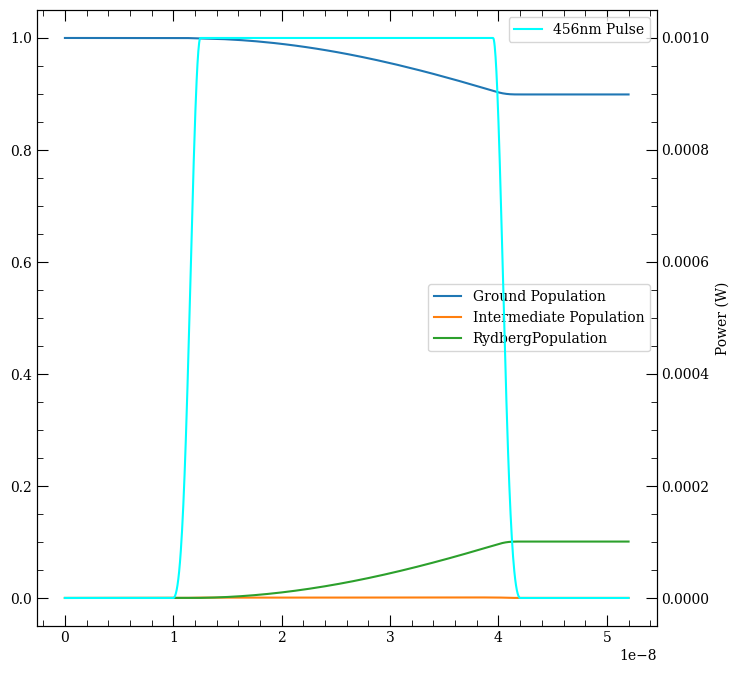

time: 9.37 s (started: 2024-04-22 15:55:42 -07:00)


In [3]:
rydnamics.plot_state_dynamics()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


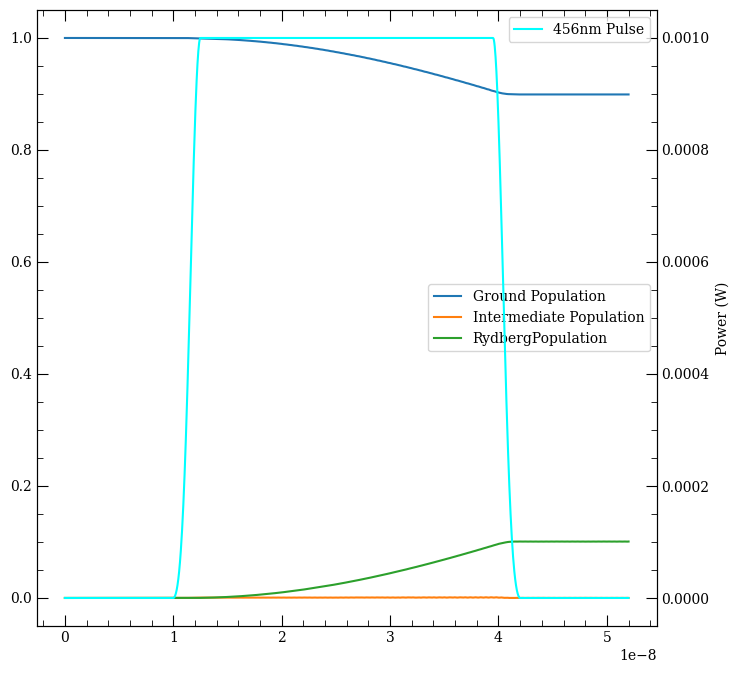

time: 9.03 s (started: 2024-04-22 15:55:51 -07:00)


In [4]:
rydnamics.plot_rho_dynamics()

At "optimal" detuning, do pi pulse durations match those calculated from theory as we change the 456nm peak power?

In [5]:
rydnamics.plot_state_hold_vs_probe_power()

  5%|███▏                                                            | 1/20 [00:15<05:03, 15.99s/it]


KeyboardInterrupt: 

time: 25.3 s (started: 2024-04-22 15:56:00 -07:00)


Observe how the Rydberg conversion efficiency decreases as the laser powers move away from the point where the pi pulse duration was calculated (indicated by the X).

In [ ]:
rydnamics.plot_state_power_vs_power_fixed_pi()

We have a lot more spare 1064nm power to play with than 456nm power (to keep the Rabi frequencies balanced). Let's see how mismatched the laser powers have to be before our "optimal" detuning is no longer close to optimal for a perfect (square) pi pulse at a fixed 456nm peak power.

In [ ]:
coupling_powers = np.linspace(0.1, 5, 25)
detunings = np.linspace(2 * np.pi * 1e9, 2 * np.pi * 10e9, 25)
probe_peak_power = 5e-3
rydnamics.plot_state_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power, duration=0)

What if we allow a finite turn on time? Since the pulse area is no longer equal to that of a pi pulse, there will be a shift of the proper detuning from "optimal". This illustrates how it is important to characterize AOM turn on/off times.

In [ ]:
coupling_powers = np.linspace(0.1, 5, 25)
detunings = np.linspace(2 * np.pi * 1e9, 2 * np.pi * 10e9, 25)
probe_peak_power = 5e-3
rydnamics.plot_state_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power, duration=50e-9)